# Map of surface concentrations

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import netCDF4 as nc

%matplotlib inline

###### Parameters:

In [2]:
imin, imax = 1479, 2179
jmin, jmax = 159, 799
isize = imax - imin
jsize = jmax - jmin

# model results:
year = 2015
results_folder1 = f'/data/brogalla/run_storage/Mn-reference-202110/ANHA12_ref-{year}_20211012/'

In [3]:
stn_i = np.array([104-1, 100, 91, 175, 175, 233, 214, 352, 242, 458, 508, 547, 629])
stn_j = np.array([370, 365, 353, 311, 326, 313, 281, 281, 364, 332, 384, 457, 471])
stn_n = np.array(['CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7',
                  'CAA8','CAA9', 'CB1','CB2','CB3','CB4'])

###### Load files:

In [4]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

In [5]:
ref   = nc.Dataset(f'{results_folder1}ANHA12_EXH006_{year}_monthly.nc',  'r')
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

In [6]:
results1  = nc.Dataset(f'{results_folder1}ANHA12_EXH006_{year}_monthly.nc')
dissolmn1 = np.array(results1.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn1 = np.array(results1.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

##### Functions:

In [7]:
def plot_layer(month, layer, variable, vmin=0,vmax=35, savefig=False):
    
#     plot_var = np.mean(variable[month,1:17,:,:], axis=0)
    plot_var = variable[month,layer,:,:]
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

    x, y = proj1(lons, lats)

    contour = proj1.contourf(x, y, plot_var, np.arange(vmin,vmax+2.5,2.5),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')

    cbar_ax = fig.add_axes([0.76, 0.25, 0.04, 0.5])
    cbar    = fig.colorbar(contour, cax=cbar_ax, ticks=np.arange(0,35,5))#[0,2,4,6,8,10,12])
    cbar.set_label('Dissolved Mn [nM]', fontsize=8) 
    cbar_ax.tick_params(axis='both', which='major', labelsize=8)
    
    if savefig:
        figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S12-profile-area-map-July.png', \
                       bbox_inches='tight', dpi=300)
        figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S12-profile-area-map-July.svg', \
                       bbox_inches='tight', dpi=300, format='svg')
    
    return

##### Figures of surface concentrations:

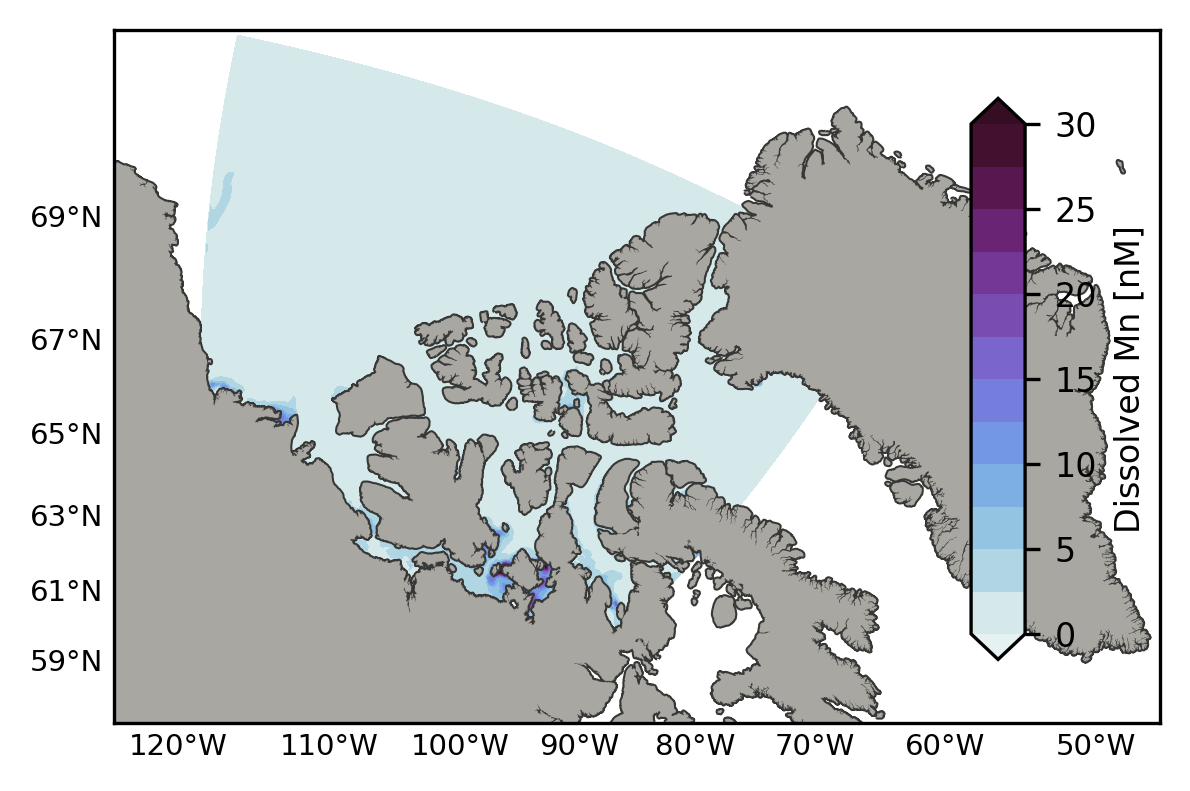

In [8]:
plot_layer(0,0,dissolmn1,vmin=0,vmax=30, savefig=False)

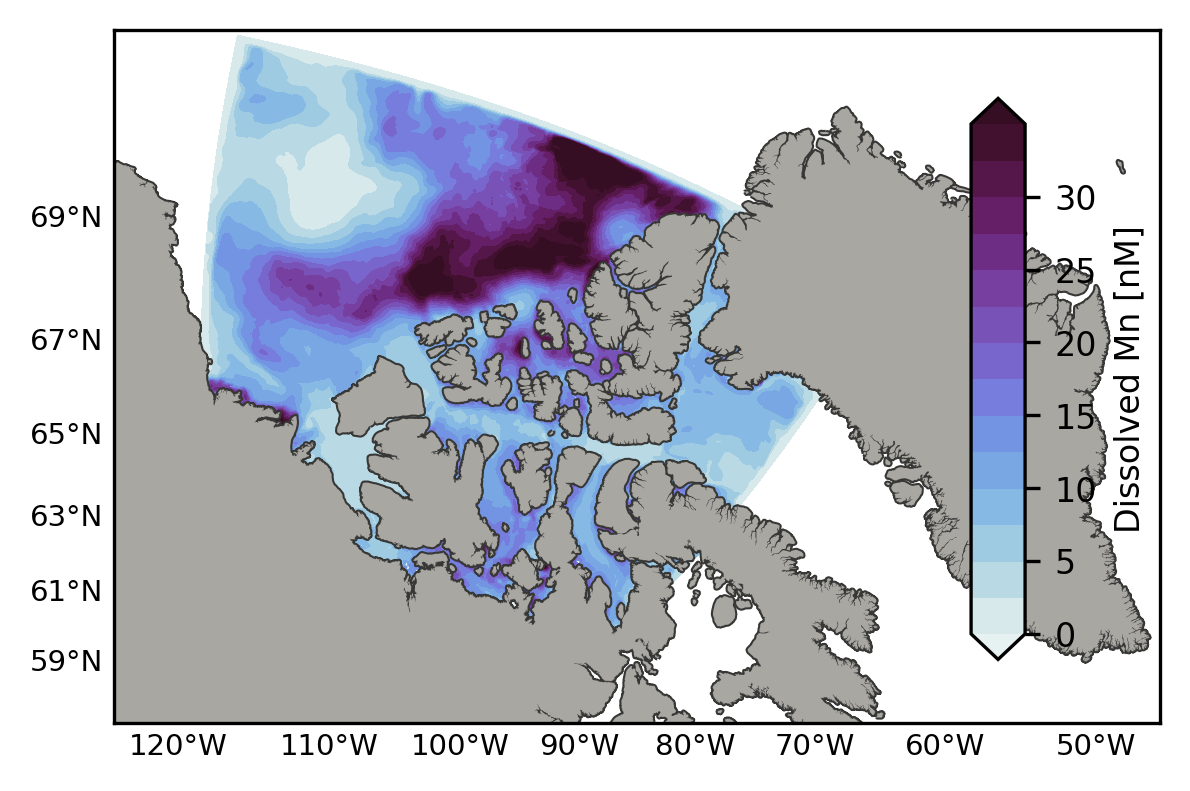

In [14]:
plot_layer(6,0,dissolmn1,vmin=0,vmax=35, savefig=False)

Canada Basin surface profile

In [10]:
month=6
i  = 608
j  = 418
di = 30
dj = 30

dmn = dissolmn1[month,:,i-di:i+di,j-dj:j+dj].mean(axis=(1,2))

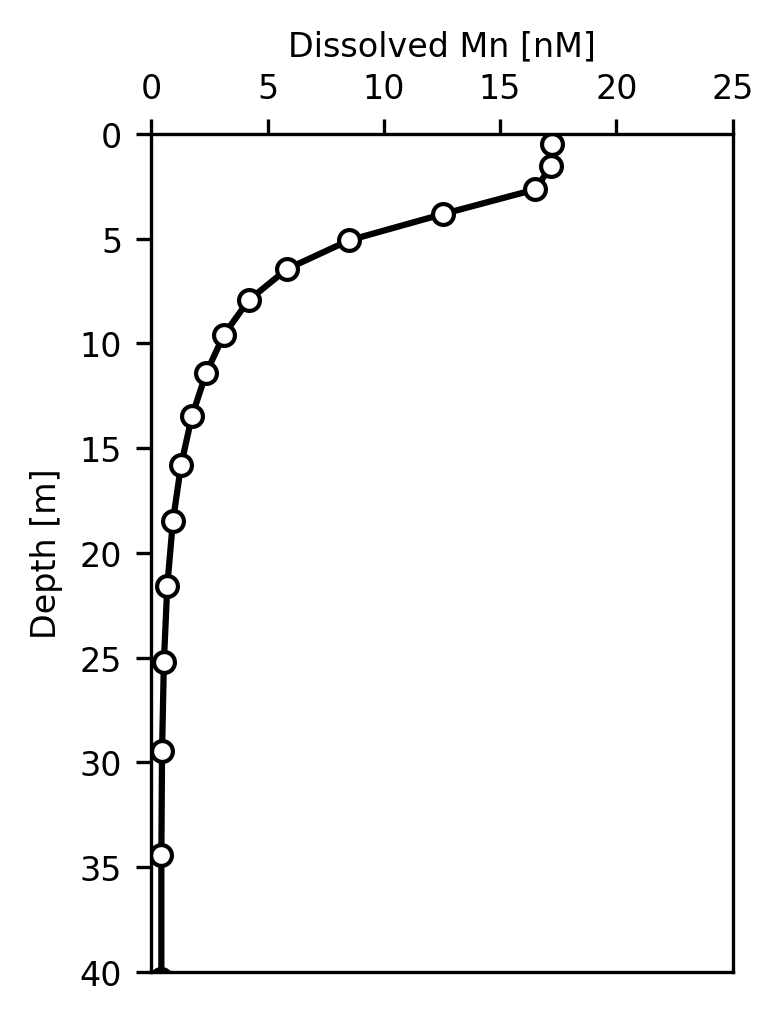

In [11]:
fig, ax = plt.subplots(1,1, figsize=(2.5, 3.7), dpi=300)

ax.invert_yaxis()
ax.plot(dmn, depth, '-k')
ax.plot(dmn, depth, '.w', markersize=10, markeredgecolor='k')

ax.set_xlabel('Dissolved Mn [nM]', fontsize=8)
ax.set_ylabel('Depth [m]', fontsize=8)
ax.set_xlim(0,25)
ax.set_ylim(40,0)
ax.tick_params(axis='both', labelsize=8)
ax.xaxis.tick_top()    
ax.xaxis.set_label_position('top') 
    
# figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/A10-profile.png', \
#                bbox_inches='tight', dpi=300)
# figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/A10-profile.svg', \
#                bbox_inches='tight', dpi=300, format='svg')